In [267]:
import matplotlib.pyplot as plt
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

<class 'numpy.ndarray'>
(2, 400) (1, 400)


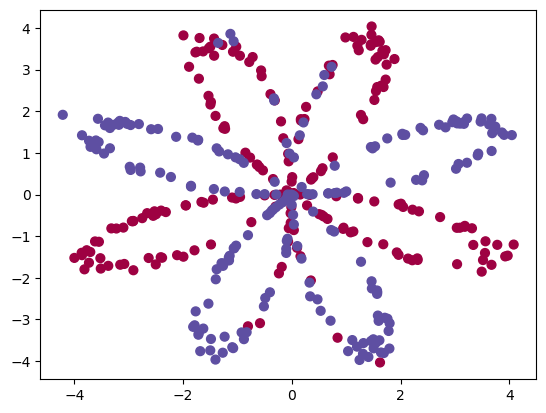

In [268]:
X, Y = load_planar_dataset()
print(type(X))
print(X.shape, Y.shape)
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [269]:
import torch
import torch.nn as nn
from tqdm import trange, tqdm  # Import tqdm explicitly
import time

class TinyModel(nn.Module):
    def __init__(self):
        super(TinyModel, self).__init__()
        self.l1 = nn.Linear(2, 10)  # Increase layer size
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(10, 6)  # Add another hidden layer
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(6, 1)

    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.act2(x)
        x = self.l3(x)  # No Sigmoid here for BCEWithLogitsLoss
        return x

In [270]:
model = TinyModel()
loss_function = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.05)
losses, accuracies = [], [] 

#print(type(X),X)
X = X.T
Y = Y.T
print(X.shape)
print(Y.shape)
#print(X)

(400, 2)
(400, 1)


Loss: 0.55, accuracy: 0.80: 100%|██████████| 1000/1000 [00:04<00:00, 230.81it/s]


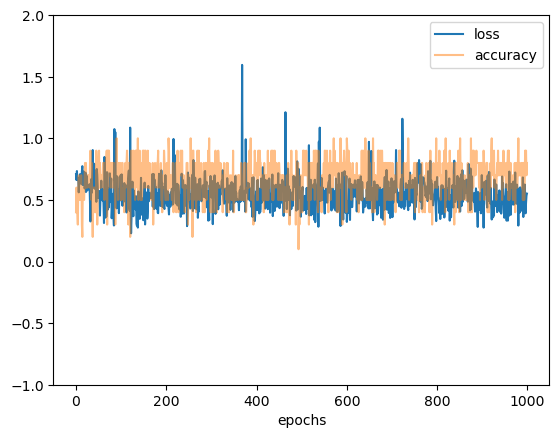

In [271]:
import numpy as np
loop_tam = 1000
BS = 10


for i in (t := trange(loop_tam)):
    samp = np.random.randint(0,X.shape[0], size = (BS))
    X_batch = torch.tensor(X[samp]).float()
    Y_batch = torch.tensor(Y[samp]).float()
    optim.zero_grad()
    #print(X_batch.shape, Y_batch.shape)    
    out = model(X_batch)
    #print(out.shape)
    prediction = (torch.sigmoid(out) >= 0.5).float()
    accuracy = (prediction == Y_batch).float().mean()
    #print(out.shape, Y.shape)
    loss = loss_function(out,Y_batch)

    # backward pass 
    loss.backward()
    optim.step()

    # output some info
    loss, accuracy = loss.item(), accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
    t.set_description(f"Loss: {loss:.2f}, accuracy: {accuracy:.2f}")

plt.ylim(-1,2)
plt.plot(losses,label='loss')
plt.plot(accuracies, alpha = 0.5,label='accuracy')
plt.xlabel('epochs')
plt.legend()
